### KRAI Lab Assignment ###

1. Write a program to cluster a set of points using K-means. Consider, K=4, clusters.
Consider Euclidean distance as the distance measure. Randomly initialize a cluster
mean as one of the data points. Iterate for 10 iterations. After iterations are over, print
the final cluster means for each of the clusters.

Data set iris data set

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import random

# Load the Iris dataset
iris = load_iris()
data = iris.data
n_samples, n_features = data.shape

# Set the number of clusters
K = 4

# Initialize cluster centroids randomly as data points
random.seed(0)
initial_centroids = random.sample(range(n_samples), K)
centroids = data[initial_centroids]

# Number of iterations
num_iterations = 10

# Main K-means clustering loop
for iteration in range(num_iterations):
    # Assign each point to the nearest cluster
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    # Update cluster centroids
    new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(K)])
    
    # Check for convergence
    if np.all(centroids == new_centroids):
        break

    centroids = new_centroids

# Print final cluster means
for k in range(K):
    print(f"Cluster {k + 1} mean: {centroids[k]}")


Cluster 1 mean: [5.52962963 2.62222222 3.94074074 1.21851852]
Cluster 2 mean: [6.9125   3.1      5.846875 2.13125 ]
Cluster 3 mean: [5.006 3.428 1.462 0.246]
Cluster 4 mean: [6.23658537 2.85853659 4.80731707 1.62195122]


2. The table below gives the amount of Crabby Cakes made by Bakers for each year he’s
worked.
Graph the data on a scatter plot, find the line of best fit, and write the equation for the
line you draw.

Correlation Coefficient (r): _________

Type of Correlation: ______________________

Using the linear regression equation predict how many Crabby cakes he will make
after working 10 years

In [3]:
Years_worked= 1,2,3,4,5,6
Cakes_made= 6500,7805,10835,11230,15870,16387

to solve this :

1. We Calculate the correlation coefficient(r) to determine the typeof correlation (positive or negative)
2. Perform linear regression to find the equation of the line of best fit.
3. Use the linear regression equation to prdict the number of Crabby cakes made after workng for 10 years.

Correlation Coefficient (r): 0.98
Type of Correlation: positive
Predicted Cakes after 10 years: 25185.33


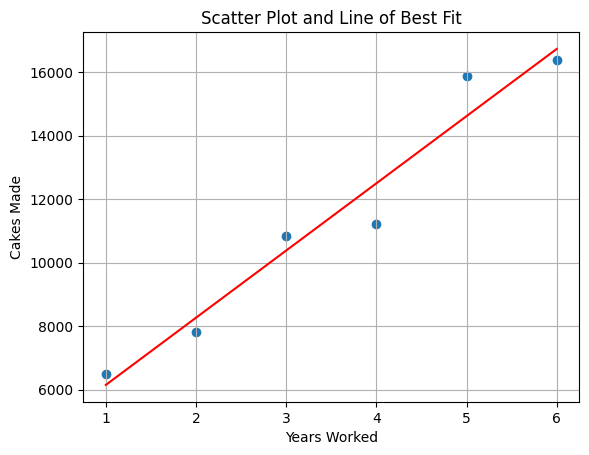

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data
years_worked = np.array([1, 2, 3, 4, 5, 6])
cakes_made = np.array([6500, 7805, 10835, 11230, 15870, 16387])

# Calculate the correlation coefficient (r)
r, _ = stats.pearsonr(years_worked, cakes_made)

# Plot the scatter plot
plt.scatter(years_worked, cakes_made)

# Perform linear regression to find the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(years_worked, cakes_made)
line_of_best_fit = slope * years_worked + intercept
plt.plot(years_worked, line_of_best_fit, 'r')

# Label the plot
plt.xlabel('Years Worked')
plt.ylabel('Cakes Made')
plt.title('Scatter Plot and Line of Best Fit')

# Print the correlation coefficient (r)
print(f'Correlation Coefficient (r): {r:.2f}')

# Determine the type of correlation
if r > 0:
    correlation_type = 'positive'
elif r < 0:
    correlation_type = 'negative'
else:
    correlation_type = 'no correlation'
print(f'Type of Correlation: {correlation_type}')

# Predict cakes made after 10 years using the linear regression equation
years_to_predict = 10
predicted_cakes = slope * years_to_predict + intercept
print(f'Predicted Cakes after 10 years: {predicted_cakes:.2f}')

# Display the plot

plt.grid(True)
plt.show()


3. Write a program for multiple regression for predicting stock_index_price (dependent
Variable) using two independent variables (interest_rate and unemployment_rate).
Refer Stock_data 
Predict Stock index price for interest rate = 3 and unemployment rate is 5.7 

In [21]:
!pip install openpyxl


     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ------ ------------------------------ 41.0/250.0 kB 495.5 kB/s eta 0:00:01
     --------- --------------------------- 61.4/250.0 kB 656.4 kB/s eta 0:00:01
     ---------------- ------------------- 112.6/250.0 kB 731.4 kB/s eta 0:00:01
     ----------------------------- -------- 194.6/250.0 kB 1.1 MB/s eta 0:00:01
     -------------------------------------  245.8/250.0 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.0 MB/s eta 0:00:00


In [23]:
print(data.columns)

Index(['Interest Rate', 'Unemployement_rate', 'Stock_index_price'], dtype='object')


In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data from the Excel file
data = pd.read_excel("Stock_data.xlsx")

# Extract independent variables
X = data[['Interest Rate', 'Unemployement_rate']]
y = data['Stock_index_price']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict Stock index price for interest rate = 3 and unemployment rate = 5.7
interest_rate = 3
unemployment_rate = 5.7
predicted_stock_price = model.predict([[interest_rate, unemployment_rate]])

print(f'Predicted Stock Index Price: {predicted_stock_price[0]:.2f}')



Predicted Stock Index Price: 1409.15


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Predicted Stock Index Price: 1409.15 ##


4. Write a multiple regression program for predicting CO2 emission level when Volume
1300 of Car is and Engine weight is 3300Kg. Refer Car data file. 

In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data from the Excel file
data = pd.read_excel("car_data.xlsx")

# Extract independent variables
X = data[['Volume', 'Weight']]

# Extract dependent variable
y = data['CO2']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict CO2 emission level for Volume = 1300 and Engine Weight = 3300Kg
volume = 1300
engine_weight = 3300
predicted_co2_emission = model.predict([[volume, engine_weight]])

print(f'Predicted CO2 Emission: {predicted_co2_emission[0]:.2f}')


Predicted CO2 Emission: 114.76


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Predicted CO2 Emission: 114.76


5. Write a logistic regression program for predicting customer will subscribe for term
deposit Refer Bank data set 1


In [35]:
print(data.columns)

Index(['duration', 'Subscription '], dtype='object')


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from the Excel file
data = pd.read_excel("Bank dataset 1.xlsx")

# Select the relevant features and target variable
X = data[['duration']]
y = data['Subscription ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_report_str)

# Predict if a customer will subscribe
new_duration = pd.DataFrame({'duration': [200]})
new_prediction = model.predict(new_duration)
print('New Customer Subscription Prediction:')
if new_prediction[0] == 1:
    print('Customer will subscribe.')
else:
    print('Customer will not subscribe.')


Accuracy: 0.65
Confusion Matrix:
[[7 4]
 [3 6]]
Classification Report:
              precision    recall  f1-score   support

          no       0.70      0.64      0.67        11
         yes       0.60      0.67      0.63         9

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20

New Customer Subscription Prediction:
Customer will not subscribe.


6. Write a logistic regression program for predicting customer will subscribe for term
deposit Refer Bank data set 2


In [78]:
data = pd.read_excel("Bank data set 2.xlsx")

In [79]:
data

,Duration,Subscription
0,171,no
1,840,yes
2,206,no
3,747,yes
4,263,no
5,331,yes
6,334,no
7,268,no
8,208,yes
9,268,yes


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Drop rows with missing target values (NaN)
data = data.dropna(subset=['Subscription'])

# Select the relevant features and target variable
X = data['Duration ']
y = data['Subscription']

# Reshape 'duration' into a 2D array with a single feature
X = X.values.reshape(-1, 1)

# Split the data into training and testing sets
# Split the data into training and testing sets with a specified train size
# Split the data into training and testing sets with a 10% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,train_size=0.5, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_report_str)

# Predict if a customer will subscribe
new_duration = pd.DataFrame({'duration': [200]})
new_prediction = model.predict(new_duration.values.reshape(-1, 1))
print('New Customer Subscription Prediction:')
if new_prediction[0] == 1:
    print('Customer will subscribe.')
else:
    print('Customer will not subscribe.')


Accuracy: 0.73
Confusion Matrix:
[[ 9  2]
 [ 5 10]]
Classification Report:
              precision    recall  f1-score   support

          no       0.64      0.82      0.72        11
         yes       0.83      0.67      0.74        15

    accuracy                           0.73        26
   macro avg       0.74      0.74      0.73        26
weighted avg       0.75      0.73      0.73        26

New Customer Subscription Prediction:
Customer will not subscribe.


9. Write a program to classify iris data set using Random forest method 

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_report_str)


Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We load the Iris dataset using scikit-learn's load_iris function.

We split the dataset into training and testing sets.
    
We create a Random Forest Classifier with 100 trees (you can adjust the n_estimators parameter as needed).

We fit the model to the training data.
    
We make predictions on the test set and evaluate the model's performance using accuracy, confusion matrix, and a classification report.

10. Write a program to classify the social network Advertise data1 using Bay’s
classification method. 

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from the CSV file
data = pd.read_csv('Social_Network_Ads1.csv')

# Select the relevant features (independent variables) and target variable
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier (GaussianNB for continuous features)
naive_bayes_classifier = GaussianNB()

# Fit the model to the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_report_str)


Accuracy: 0.93
Confusion Matrix:
[[50  2]
 [ 4 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.92      0.86      0.89        28

    accuracy                           0.93        80
   macro avg       0.92      0.91      0.92        80
weighted avg       0.92      0.93      0.92        80



11. Write a program to classify the social network Advertise data2 using Bay’s
classification method


In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from the CSV file
data = pd.read_csv('Social_Network_Ads2.csv')

# Select the relevant features (independent variables) and target variable
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier (GaussianNB for continuous features)
naive_bayes_classifier = GaussianNB()

# Fit the model to the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_report_str)


Accuracy: 0.86
Confusion Matrix:
[[34  2]
 [ 4  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        36
           1       0.50      0.33      0.40         6

    accuracy                           0.86        42
   macro avg       0.70      0.64      0.66        42
weighted avg       0.84      0.86      0.84        42



12. Demonstrate the SVM model using the social network Advertise data1 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from your dataset (replace 'data1.csv' with your dataset's file name)
data = pd.read_csv('Social_Network_Ads1.csv')

# Select the relevant features (independent variables) and target variable
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the model to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_report_str)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from your dataset (replace 'data1.csv' with your dataset's file name)
data = pd.read_csv('Social_Network_Ads2.csv')

# Select the relevant features (independent variables) and target variable
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the model to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_report_str)
